[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778 

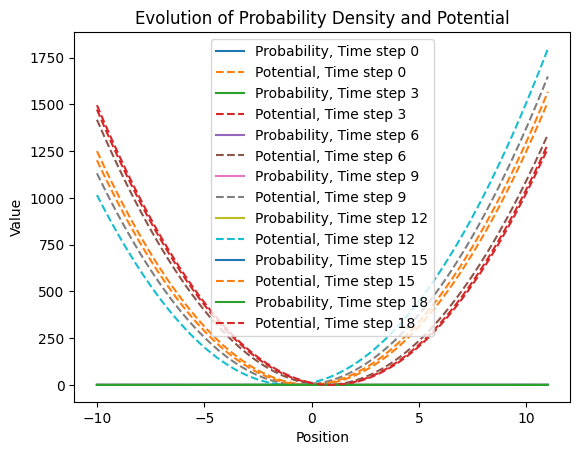

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100000  # Number of spatial grid points
L = 10.0  # Spatial range [-L, L]
dx = 2.0 * L / N
x = np.linspace(-L, L+1-dx, N)
V0 = 1.0  # Amplitude of potential
omega = 5  # Frequency of potential
T = 10.0  # Total simulation time
dt = 0.5  # Time step
m = 1

# Create potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 *(x - np.sin(omega * t)) ** 2

# Create the kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    print(kx)
    return np.exp(-1j * kx ** 2 * dt / 2.0)

# Create the potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# Initialize wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x=x))

# Time evolution using split-operator method
num_steps = int(T / dt)
plot_interval = 3  # Plot every 10 steps

# Create an array to store potential values for each time step
potential_values = np.zeros((num_steps, N))

# Create a figure and axis for plotting
plt.figure()

for step in range(num_steps):
    # Calculate potential at current time step
    V = potential(x, step * dt)
    potential_values[step, :] = V
    
    # Calculate kinetic operator and apply it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculate potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculate kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Plotting the wavefunction and potential at specified intervals
    if step % plot_interval == 0:
        plt.plot(x, np.abs(psi) ** 2, label=f'Probability, Time step {step}')
        plt.plot(x, V, label=f'Potential, Time step {step}', linestyle='dashed')

plt.title("Evolution of Probability Density and Potential")
plt.xlabel("Position")
plt.ylabel("Value")
plt.legend()
plt.show()


[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778  -0.62831853
 -0.31415927]
[ 0.          0.31415927  0.62831853 ... -0.9424778 

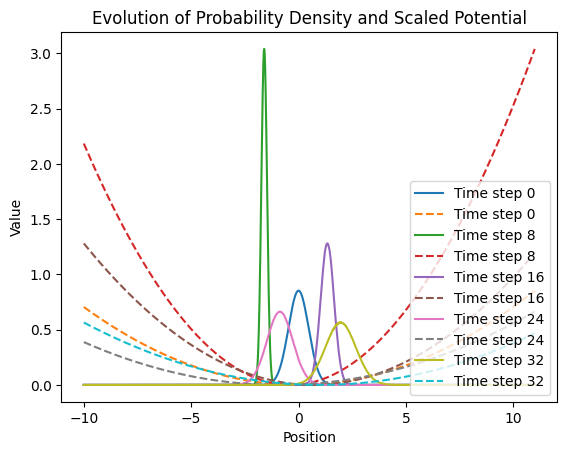

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100000  # Number of spatial grid points
L = 10.0  # Spatial range [-L, L]
dx = 2.0 * L / N
x = np.linspace(-L, L+1-dx, N)
V0 = 1  # Amplitude of potential
omega = 4.9  # Frequency of potential
T = 10.0  # Total simulation time
dt = 0.25  # Time step
m = 1

# Create potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 * (x - np.sin(omega * t)) ** 2

# Create the kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    print(kx)
    return np.exp(-1j * kx ** 2 * dt / 2.0)

# Create the potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# Initialize wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x=x))

# Time evolution using split-operator method
num_steps = int(T / dt)
plot_interval = 8  # Plot every 2 steps

# Create a figure and axis for plotting
plt.figure()

for step in range(num_steps):
    # Calculate potential at current time step
    V = potential(x, step * dt)
    
    # Calculate kinetic operator and apply it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculate potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculate kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
    psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x))
   
    # Plotting the wavefunction and potential at specified intervals
    if step % plot_interval == 0:
        plt.plot(x, np.abs(psi) ** 2, label=f'Time step {step}')
       # plt.plot(x, np.abs(psi) ** 2)
        plt.plot(x, V * max(np.abs(psi) ** 2) / max(V), label=f'Time step {step}', linestyle='dashed')
        #plt.plot(x, V * np.max(np.abs(psi) ** 2) / np.max(V))
        plt.title("Evolution of Probability Density and Scaled Potential")
        plt.xlabel("Position")
        plt.ylabel("Value")
        plt.legend(loc=4)
       # plt.show()
plt.show()


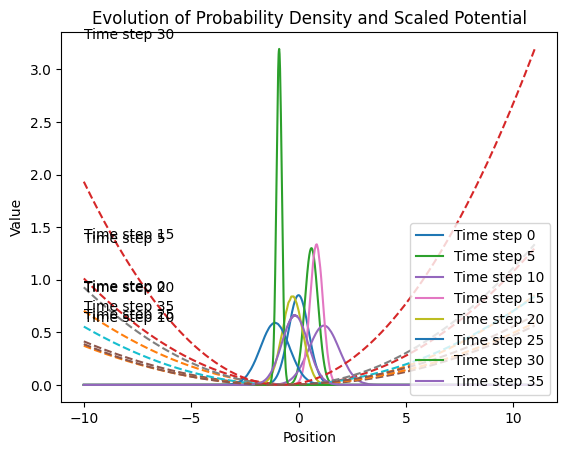

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100000  # Number of spatial grid points
L = 10.0  # Spatial range [-L, L]
dx = 2.0 * L / N
x = np.linspace(-L, L+1-dx, N)
V0 = 1  # Amplitude of potential
omega = 4.9  # Frequency of potential
T = 10.0  # Total simulation time
dt = 0.25  # Time step
m = 1

# Create potential function
def potential(x, t):
    return 0.5 * m * omega ** 2 * (x - np.sin(omega * t)) ** 2

# Create the kinetic energy operator
def kinetic_operator(N, dx):
    kx = np.fft.fftfreq(N, dx) * 2 * np.pi
    return np.exp(-1j * kx ** 2 * dt / 2.0)

# Create the potential operator
def potential_operator(potential_values):
    return np.exp(-1j * potential_values * dt)

# Initialize wavefunction
psi = np.exp(-(x ** 2) / 2.0) / np.pi ** (1 / 4)
psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x=x))

# Time evolution using split-operator method
num_steps = int(T / dt)
plot_interval = 5  # Plot every 2 steps

# Create a figure and axis for plotting
plt.figure()

for step in range(num_steps):
    # Calculate potential at current time step
    V = potential(x, step * dt)
    
    # Calculate kinetic operator and apply it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
   
    # Calculate potential operator and applying it in position space
    psi *= potential_operator(V)
   
    # Calculate kinetic operator and applying it in momentum space
    psi = np.fft.fft(psi)
    psi *= kinetic_operator(N, dx)
    psi = np.fft.ifft(psi)
    psi /= np.sqrt(np.trapz(np.abs(psi) ** 2, x))
   
    # Plotting the wavefunction and potential at specified intervals
    if step % plot_interval == 0:
        plt.plot(x, np.abs(psi) ** 2, label=f'Time step {step}')
        plt.plot(x, V * max(np.abs(psi) ** 2) / max(V), linestyle='dashed')
        
        # Calculate y-coordinate for the time label (above the plot)
        y_label = 1.02 * max(np.abs(psi) ** 2)
        
        plt.annotate(f'Time step {step}', xy=(x[0], y_label),
                     xytext=(x[0], y_label),
                     verticalalignment='bottom', horizontalalignment='left')
        
plt.title("Evolution of Probability Density and Scaled Potential")
plt.xlabel("Position")
plt.ylabel("Value")
plt.legend(loc=4)

plt.show()
